# Product category classification Tasks

Shuxin Mao & Juan Cao & Shimin Zhao

data stet source: https://www.kaggle.com/mehdidag/black-friday#BlackFriday.csv

Load and Analysis Data:
* [Loading Data](#Loading-Data)
* [Data Visualization](#Data-Visualization)

Develop, Train and Analysis Classffiers Perfomance:
* [Pre-process the data](#Pre-process-the-data)
* [Taining and Perfomance](#Tainin-and-Perfomance)
    * KNN Classifier
    * Bagging with KNN Classifier
    * Naive Bayes Classifier
    * Decision Tree Classifier
    * Bagging with Decision Tree Classifier
    * Adaboost with Decision Tree Classifier
    * Random Forest Classifier
* [Cross Validation Score Comparison](#Cross-Validation-Score-Comparison)
 
 
 
Code Reference:
* Richard Stansbury,"Stansbury's Demo Notebook" Github.com, para. 7, Mar. 05, 2019. [Online]. Available: https://github.com/richss/cs455-ml-demos.
* A. Geron, Hands-On Machine Learning Repository, Github.com, Online at: https://github.com/ageron/handson-ml

## Summary

Load and Analysis Data:
    The data has neither missing feature value nor object feature, so data pre-process part only adds a pair of strong correlated features as a new feature with few other high relatted features as input features. Also train data and test data are splitted in this part.

Develop, Train and Analysis Classffiers Perfomance:
    Fitting trainning data into six classfiers(KNN, Naive Bayes, Decision Tree, Random Forest), using K-fold (K=10) to calculate confusion matrix and the performance(accuracy, precision, recall, f1 score) of different classifiers. Also tried to improve KNN and Decision Tree by adding bagging and Adaboost ensemble methods. At last, using test data to see models' final predic result.

## Loading Data

In [3]:
import pandas as pd
import os
data_df = pd.read_csv("BlackFriday.csv", nrows = 30000) #Loading Data
#Because the data set is too large, I choose the first 30,000 lines for model training.

This data set has 12 different columns, each representing a corresponding variable below.

User_ID: Unique identifier of shopper.

Product_ID: Unique identifier of product. (No key given)

Gender: Sex of shopper.

Age: Age of shopper split into bins.

Occupation: Occupation of shopper. (No key given)

City_Category: Residence location of shopper. (No key given)

Stay_In_Current_City_Years: Number of years stay in current city.

Marital_Status: Marital status of shopper.

Product_Category_1: Product category of purchase.

Product_Category_2: Product may belong to other category.

Product_Category_3: Product may belong to other category.

Purchase: Purchase amount in dollars.

In [4]:
data_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
User_ID                       30000 non-null int64
Product_ID                    30000 non-null object
Gender                        30000 non-null object
Age                           30000 non-null object
Occupation                    30000 non-null int64
City_Category                 30000 non-null object
Stay_In_Current_City_Years    30000 non-null object
Marital_Status                30000 non-null int64
Product_Category_1            30000 non-null int64
Product_Category_2            20513 non-null float64
Product_Category_3            9083 non-null float64
Purchase                      30000 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 2.7+ MB


In [6]:
# Use 0 to represent male and use 1 to represent female
gender_mapping = {'F': 0, 'M': 1}
data_df['Gender'] = data_df['Gender'].map(gender_mapping)

In [7]:
data_df.head() # To see if the mapping function works

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
data_df.describe()

,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,20513.000000,9083.000000,30000.000000
mean,1.002318e+06,0.772533,8.304967,0.394200,5.292767,9.869107,12.757239,9251.874833
std,1.329124e+03,0.419203,6.558409,0.488686,3.736770,5.074117,4.112406,4946.574659
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001172e+06,1.000000,3.000000,0.000000,1.000000,5.000000,9.000000,5831.000000
50%,1.002230e+06,1.000000,7.000000,0.000000,5.000000,9.000000,15.000000,8043.000000
75%,1.003526e+06,1.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12020.000000
max,1.004555e+06,1.000000,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [13]:
# Correlation Coefficient Between Each Feature 
corr_matrix = data_df.corr()
corr_matrix["Product_Category_1"].sort_values(ascending=False)

Product_Category_1    1.000000
Product_Category_2    0.536870
Product_Category_3    0.229737
Marital_Status        0.015475
Occupation            0.002619
User_ID              -0.000297
Gender               -0.039308
Purchase             -0.330884
Name: Product_Category_1, dtype: float64

## Data Visualization

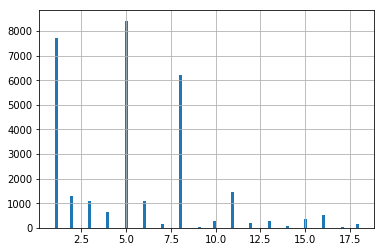

In [10]:
data_df["Product_Category_1"].hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201B4DD15F8>,
      dtype=object)

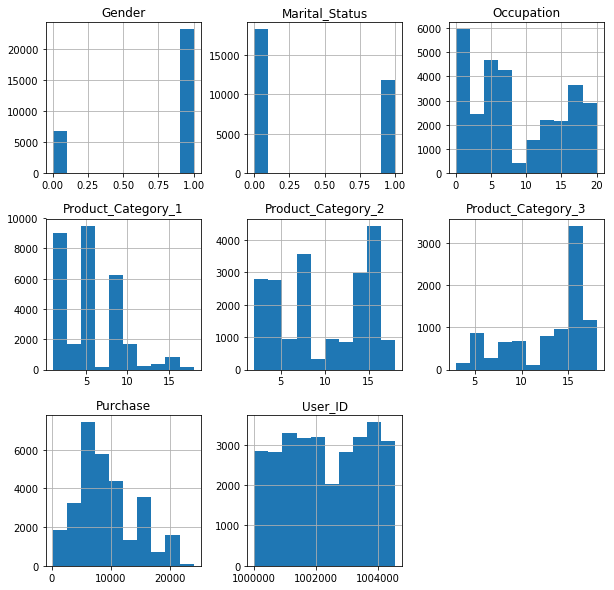

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

data_df.hist(figsize=(10,10))

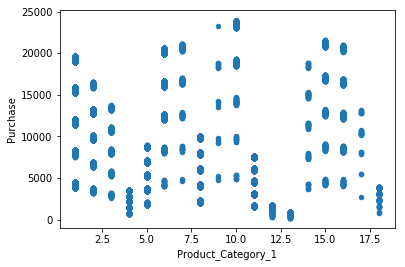

In [12]:
data_df.plot(kind="scatter",x="Product_Category_1",y="Purchase")

## Pre-process the data

In [8]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np

In [9]:
# Create a DataFrameSelector, which will return all of the data associated with the tags we pass into it. 

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attributes):
        self.attributes = attributes
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attributes]
    
    
# Split the data set to train set and test set.
train_df, test_df = train_test_split(data_df, test_size=0.2)
print(len(train_df), "train X +", len(test_df), "test X")

# Extract Numeric Data:
#
# Builds a pipeline of transforms. First, the columns are extracted for desired data frame columns.
# Next, it reads the numeric values and replaces NaN cells with the median of the overall column.

numeric_pipe = Pipeline([
        ("Select", DataFrameSelector(["Occupation", "Marital_Status", "Purchase"])), # Selects Fields from dataframe
        ("Imputer", SimpleImputer(strategy="median")),   # Fills in NaN w/ median value for its column
    ])

# Handle Missing Category Cells:
#
# This imputer reads the data elements passed into it and generates a count for each of the 
# categories for each column.  During the transform, it will replace NaN with the most frequently used 
# for that column
#
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X], 
                                       index = X.columns)
        return self
    
    def transform(self, X):
        return X.fillna(self.most_frequent)
    
# Extract Categorical Data
#
# Creates an pipeline to first reads and then transform the data with the MostFrequentImputer.  
# Next, it does OneHot encoding, which converts each category into a binary numeric representation 
# where each bit represents one category. 

categories_pipe = Pipeline([
        ("Select", DataFrameSelector(["Gender"])), # Selects Fields from dataframe
        ("MostFreqImp", MostFrequentImputer()), # Fill in NaN with most frequent
    ])


# Produces np array with 1 bits for Famale.

# Assemble the Training Data
#
# We will use the two previously built pipelines to process the data and then will join the data together.
preprocessing_pipe = FeatureUnion(transformer_list = [
        ("numeric pipeline", numeric_pipe), 
        ("categories pipeline", categories_pipe)
     ])
    
train_X_data = preprocessing_pipe.fit_transform(train_df)
test_X_data = preprocessing_pipe.fit_transform(test_df)

# Preview row of training data (one passenger's data)
train_X_data[0]

40000 train X + 10000 test X


array([4.000e+00, 0.000e+00, 9.792e+03, 1.000e+00])

In [10]:
train_y_data = train_df["Product_Category_1"]
test_y_data = test_df["Product_Category_1"]
target_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
feature_names = ["Occupation", "Marital_Status", "Purchase", "Famale"]

## Taining and Perfomance

In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, precision_score, accuracy_score
from sklearn.metrics import classification_report, recall_score, f1_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

%matplotlib inline
import matplotlib.pyplot as plt

### KNN Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

k=5
classifierknn = KNeighborsClassifier(n_neighbors=k)
classifierknn.fit(train_X_data, train_y_data) #Train on full training data set 
targetsknn = classifierknn.predict(test_X_data) #Run Prediction on test data set

# Performance Report(precision, recall, f1 score)

# Confusion Matrix 
print("confusion_matrix =")
print(confusion_matrix(test_y_data, targetsknn))

# Classification Report
print("\nclassificationreport:")
print(classification_report(test_y_data, targetsknn, target_names=target_names))

# Cross Validation Score (accuracy)
knn_scores = cross_val_score(classifierknn, train_X_data, train_y_data, cv=10) #cross-validate using 10-fold test
crossscoreknn = knn_scores.mean() # mean score across all 10 runs
print("Cross Validation Score = " + str(crossscoreknn))

confusion_matrix =
[[2274    2   13    0    0    4    0  188    0    0   16    0    0    0
     0    0    0    3]
 [   5  241    9    0   26   44    2   66    0    0    1    0    0    0
     1    5    0    1]
 [  24   15  266    7   14    0    0   33    0    0    8    0    0    0
     0    0    0    1]
 [   0    2    0  148   26    0    0   13    0    0    4    7   13    0
     0    0    0    0]
 [   0    5    0    3 2852    0    0    8    0    0    6    4    0    0
     0    0    0    0]
 [  28   39    1    0    4  217    7    6    0    0    3    0    0    0
     2   24    0    0]
 [   1    7    1    0    2   25    3    2    0    0    0    0    0    0
     7   12    0    0]
 [  90    8   13   18   18    0    0 1895    0    0   37    0    0    0
     0    0    0    5]
 [   0    1    0    0    0    0    0    0    0    7    0    0    0    0
     0    0    0    0]
 [  14    2    0    0    0    0    0    2    0   84    0    0    0    4
     1    0    0    0]
 [  35    0    0    2   13    0

### Bagging with KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

k=5
baseclassifierknn = KNeighborsClassifier(n_neighbors=k)

bag_knn = BaggingClassifier(
    baseclassifierknn,
    n_estimators = 500,
    max_samples=0.5, 
    n_jobs = -1,
    bootstrap=True)

bag_knn.fit(train_X_data, train_y_data) #Train on full training data set 
targetsbagknn = bag_knn.predict(test_X_data) #Run Prediction on test data set

# Performance Report(precision, recall, f1 score)

# Confusion Matrix 
print("confusion_matrix =")
print(confusion_matrix(test_y_data, targetsbagknn))

# Classification Report
print("\nclassificationreport:")
print(classification_report(test_y_data, targetsbagknn, target_names=target_names))

# Cross Validation Score (accuracy)
bag_knn_scores = cross_val_score(bag_knn, train_X_data, train_y_data, cv=10) #cross-validate using 10-fold test
crossscorebagknn = bag_knn_scores.mean() # mean score across all 10 runs
print("Cross Validation Score = " + str(crossscorebagknn))

confusion_matrix =
[[2258    0    9    0    0    1    0  212    0    0   19    0    0    0
     0    0    0    1]
 [   5  233    8    0   26   58    1   67    0    0    1    0    0    0
     0    1    0    1]
 [  26   17  258    8   15    0    0   35    0    0    8    0    0    0
     0    0    0    1]
 [   0    0    0  155   29    0    0    3    0    0    5    7   14    0
     0    0    0    0]
 [   0    0    0    2 2865    0    0    4    0    0    2    5    0    0
     0    0    0    0]
 [  28   28    1    0    5  238    1    7    0    0    3    0    0    0
     1   19    0    0]
 [   1    6    1    0    2   29    2    2    0    0    0    0    0    0
     7   10    0    0]
 [  23    0    0   19   19    0    0 2011    0    0    9    0    0    0
     0    0    0    3]
 [   0    1    0    0    0    0    0    0    0    7    0    0    0    0
     0    0    0    0]
 [  15    1    0    0    0    0    0    3    0   86    0    0    0    1
     1    0    0    0]
 [  30    0    0    2   10    0

E:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.94      0.90      0.92      2500
           2       0.71      0.58      0.64       401
           3       0.91      0.70      0.79       368
           4       0.80      0.73      0.76       213
           5       0.95      1.00      0.97      2878
           6       0.57      0.72      0.64       331
           7       0.13      0.03      0.05        60
           8       0.81      0.96      0.88      2084
           9       0.00      0.00      0.00         8
          10       0.87      0.80      0.83       107
          11       0.79      0.63      0.71       495
          12       0.67      0.55      0.60        73
          13       0.87      1.00      0.93       107
          14       0.88      0.19      0.32        36
          15       0.73      0.35      0.47       115
          16       0.44      0.23      0.30       173
          17       1.00      0.14      0.25         7
          18       0.53    

### Gaussian Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB

classifiernb = GaussianNB()
classifiernb.fit(train_X_data, train_y_data) #Train on full training data set 
targetsnb = classifiernb.predict(test_X_data) #Run Prediction on test data set


# Confusion Matrix 
print("confusion_matrix =")
print(confusion_matrix(test_y_data, targetsnb))

# Performance Report(precision, recall, f1 score)
print("\nclassificationreport:")
print(classification_report(test_y_data, targetsnb, target_names=target_names))

# Cross Validation Score (accuracy)
nb_scores = cross_val_score(classifiernb, train_X_data, train_y_data, cv=10) #cross-validate using 10-fold test
crossscorenb = nb_scores.mean() # mean score across all 10 runs
print("Cross Validation Score = " + str(crossscorenb))

confusion_matrix =
[[2041    0    0    0  279    0    0  180    0    0    0    0    0    0
     0    0    0    0]
 [ 244    0    0    0   73    0    0   84    0    0    0    0    0    0
     0    0    0    0]
 [ 199    0    0    1   56    0    0  112    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0   84   94    0    0    0    0    0    0    9   26    0
     0    0    0    0]
 [   0    0    0  173 2107    0    0  598    0    0    0    0    0    0
     0    0    0    0]
 [ 303    0    0    0    8    0    0   20    0    0    0    0    0    0
     0    0    0    0]
 [  53    0    0    0    2    0    0    5    0    0    0    0    0    0
     0    0    0    0]
 [ 238    0    0   72  975    0    0  799    0    0    0    0    0    0
     0    0    0    0]
 [   7    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0]
 [ 104    0    0    0    1    0    0    2    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0   61  423    0

E:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Score = 0.5118975783189117


### Decision tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

classifierdt = DecisionTreeClassifier(max_depth=15)
classifierdt.fit(train_X_data, train_y_data) #Train on full training data set 
targetsdt = classifierdt.predict(test_X_data) #Run Prediction on test data set


# Confusion Matrix 
print("confusion_matrix =")
print(confusion_matrix(test_y_data, targetsdt))

# Performance Report(precision, recall, f1 score)
print("\nclassificationreport:")
print(classification_report(test_y_data, targetsdt, target_names=target_names))

# Cross Validation Score (accuracy)
dt_scores = cross_val_score(classifierdt, train_X_data, train_y_data, cv=10) #cross-validate using 10-fold test
crossscoredt = dt_scores.mean() # mean score across all 10 runs
print("Cross Validation Score = " + str(crossscoredt))

confusion_matrix =
[[2225    7   15    0    0   19    0  189    0    8   25    0    0    6
     1    4    0    1]
 [   5  224    6    0   26   59    0   64    0    1    1    0    0    0
     7    6    1    1]
 [  22   16  258    7   13    2    0   33    0    0    9    0    0    2
     4    0    2    0]
 [   0    3    7  146   25    0    0    2    0    0    7   11   12    0
     0    0    0    0]
 [   0   11    6    4 2832    3    0    0    0    0    0    9    0    0
     3    9    0    1]
 [  22   22    2    0    4  217   14    5    0    0    3    0    0    0
     6   36    0    0]
 [   1    2    1    0    2   24   10    2    0    0    0    0    0    0
     4   14    0    0]
 [  94   24    8   18   22    1    0 1893    0    0   22    0    0    1
     0    0    0    1]
 [   0    1    0    0    0    0    0    0    2    4    0    0    0    1
     0    0    0    0]
 [  14    1    0    0    0    0    0    3    3   79    0    0    0    6
     1    0    0    0]
 [  27    1    0    2   11    3

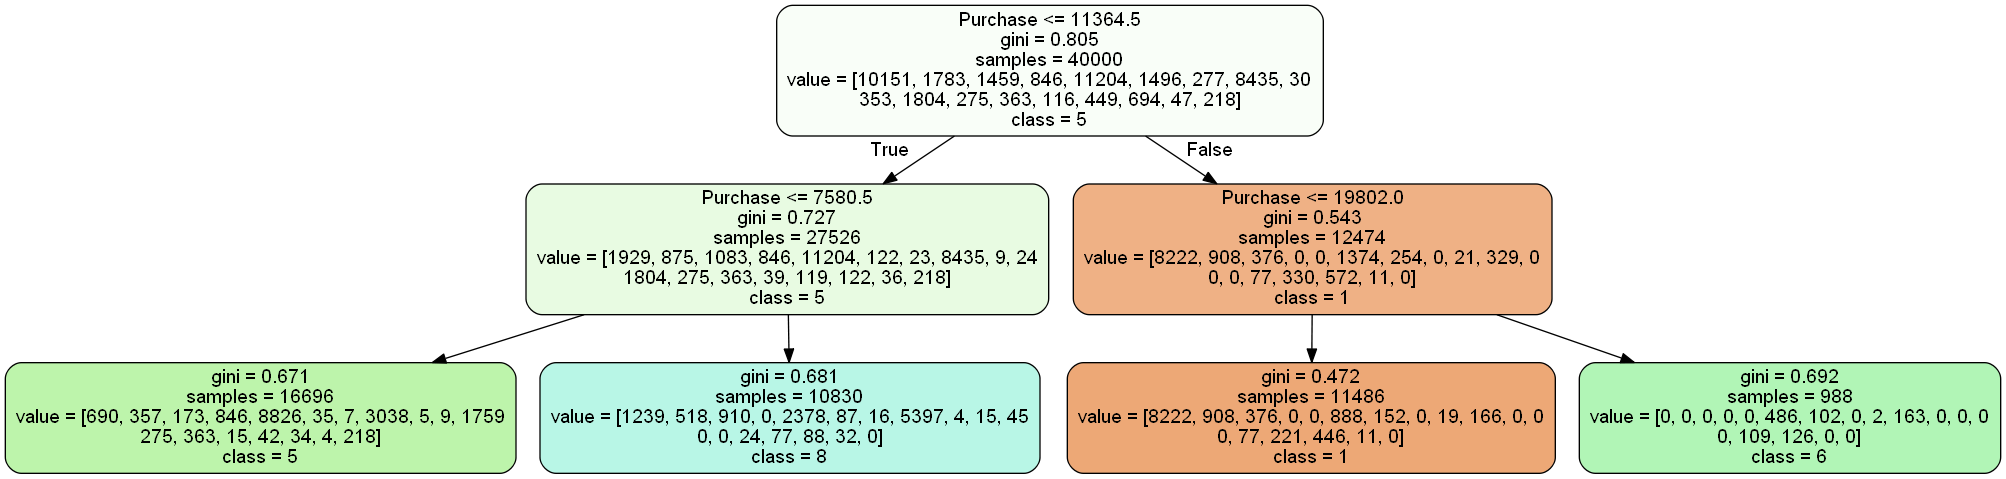

In [27]:
# Visualization of the Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image as PImage
from sklearn import tree
from IPython.display import Image

clfdt = DecisionTreeClassifier(max_depth=2) # build a 2-depth DT
clfdt.fit(train_X_data, train_y_data)

dot_tree =export_graphviz(
        clfdt,
        out_file="Category.dot",
        feature_names=feature_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

!dot -Tpng Category.dot -o Category.png

PImage('Category.png') # plot the DT

### Bagging with Decision tree Classifier

In [15]:
from sklearn.ensemble import BaggingClassifier

baseclassifierdt = DecisionTreeClassifier(max_depth=15)

bag_dt = BaggingClassifier(
    baseclassifierdt,
    n_estimators = 500,
    max_samples=0.5, 
    n_jobs = -1,
    bootstrap=True)

bag_dt.fit(train_X_data, train_y_data) #Train on full training data set 
targetsbagdt = bag_dt.predict(test_X_data) #Run Prediction on test data set

# Performance Report(precision, recall, f1 score)

# Confusion Matrix 
print("confusion_matrix =")
print(confusion_matrix(test_y_data, targetsbagdt))

print("\nclassificationreport:")
print(classification_report(test_y_data, targetsbagdt, target_names=target_names))

# Cross Validation Score (accuracy)
bag_dt_scores = cross_val_score(bag_dt, train_X_data, train_y_data, cv=10) #cross-validate using 10-fold test
crossscorebagdt = bag_dt_scores.mean() # mean score across all 10 runs
print("Cross Validation Score = " + str(crossscorebagdt))

confusion_matrix =
[[2259    0    6    0    0    0    0  212    0    0   21    0    0    0
     0    0    0    2]
 [   5  229    9    0   26   62    0   67    0    0    1    0    0    0
     1    0    0    1]
 [  24   14  264    7   13    2    0   35    0    0    9    0    0    0
     0    0    0    0]
 [   0    0    0  158   29    0    0    0    0    0    4   10   12    0
     0    0    0    0]
 [   0    0    0    1 2869    0    0    1    0    0    0    7    0    0
     0    0    0    0]
 [  26   19    1    0    4  244    1    7    0    0    4    0    0    0
     3   22    0    0]
 [   1    4    1    0    2   30    7    2    0    0    0    0    0    0
     4    9    0    0]
 [  14    0    0   19   22    0    0 2026    0    0    2    0    0    0
     0    0    0    1]
 [   0    1    0    0    0    0    0    0    1    6    0    0    0    0
     0    0    0    0]
 [  14    1    0    0    0    0    0    3    0   82    0    0    0    6
     1    0    0    0]
 [  30    0    0    3   11    0

### AdaBoost with Decision tree Classifier

In [16]:
# Adaboost goes here
from sklearn.ensemble import AdaBoostClassifier

ada_dt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=15), n_estimators=1000,
    algorithm="SAMME.R", learning_rate=1.0)

ada_dt.fit(train_X_data, train_y_data) #Train on full training data set 
targetsadadt = ada_dt.predict(test_X_data) #Run Prediction on test data set

# Performance Report(precision, recall, f1 score)

# Confusion Matrix 
print("confusion_matrix =")
print(confusion_matrix(test_y_data, targetsadadt))

print("\nclassificationreport:")
print(classification_report(test_y_data, targetsadadt, target_names=target_names))

# Cross Validation Score (accuracy)
ada_dt_scores = cross_val_score(ada_dt, train_X_data, train_y_data, cv=10) #cross-validate using 10-fold test
crossscoreadadt = ada_dt_scores.mean() # mean score across all 10 runs
print("Cross Validation Score = " + str(crossscoreadadt))

confusion_matrix =
[[2248    2   22    0    0   16    0  174    0    8   21    0    0    5
     1    2    0    1]
 [   5  230   13    1   25   46    2   65    0    0    0    0    0    0
     1   10    2    1]
 [  24   12  263    7   13    2    0   31    0    0    5    0    0    1
     3    2    1    4]
 [   0    0    1  152   26    0    0   15    0    0    2    9    8    0
     0    0    0    0]
 [   0   19    6   14 2793    4    1   14    0    1    8    8    0    0
     4    6    0    0]
 [  26   26    4    0    4  202   14    3    0    0    3    0    0    0
     5   44    0    0]
 [   1    4    1    0    2   22    9    2    0    0    0    0    0    0
     4   15    0    0]
 [ 138   41   15   17   19    2    0 1775    0    0   68    0    0    1
     0    3    3    2]
 [   0    1    0    0    0    0    0    0    1    5    0    0    0    1
     0    0    0    0]
 [  14    3    0    0    0    0    0    1    2   83    0    0    0    3
     1    0    0    0]
 [  41    2    3    1    7    1

### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifierrf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_depth=15)
classifierrf.fit(train_X_data, train_y_data) #Train on full training data set 
targetsrf = classifierrf.predict(test_X_data) #Run Prediction on test data set


# Confusion Matrix 
print("confusion_matrix =")
print(confusion_matrix(test_y_data, targetsrf))

# Performance Report(precision, recall, f1 score)
print("\nclassificationreport:")
print(classification_report(test_y_data, targetsrf, target_names=target_names))

# Cross Validation Score (accuracy)
rf_scores = cross_val_score(classifierrf, train_X_data, train_y_data, cv=10) #cross-validate using 10-fold test
crossscorerf = rf_scores.mean() # mean score across all 10 runs
print("Cross Validation Score = "+ str(crossscorerf))

confusion_matrix =
[[2248    2   14    0    0   10    0  197    0    4   22    0    0    1
     0    2    0    0]
 [   5  200   16    0   28   65    1   67    0    0    5    0    0    0
     3   11    0    0]
 [  22   11  256   10   15    4    0   34    0    0    9    0    0    1
     3    2    1    0]
 [   0    1    0  144   35    0    0    4    0    0    7    4   18    0
     0    0    0    0]
 [   0    0    3    3 2854    0    0    4    0    0    2    5    0    0
     5    2    0    0]
 [  25   21    1    0    4  214   17    6    0    0    4    0    0    0
     8   31    0    0]
 [   1    3    1    0    2   28    6    2    0    0    0    0    0    0
     7   10    0    0]
 [  55    4    5   41   22    2    0 1946    0    0    9    0    0    0
     0    0    0    0]
 [   0    1    1    0    0    0    0    0    0    6    0    0    0    0
     0    0    0    0]
 [  17    1    6    0    0    0    0    3    0   70    0    0    0    9
     1    0    0    0]
 [  31    0    0   11   24    0

E:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Score = 0.8414250258053919


### Out of bag validation for Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_depth=15, oob_score=True)
rf_clf.fit(train_X_data, train_y_data)

for name, score in zip(feature_names, rf_clf.feature_importances_):
    print(name, score)
    
print("\n\nOut of Bag Validation:", rf_clf.oob_score_) # print the oob validation score

Occupation 0.026957903737106284
Marital_Status 0.00351982759853577
Purchase 0.9658705912910927
Famale 0.003651677373265722


Out of Bag Validation: 0.842325


## Cross Validation Score Comparison

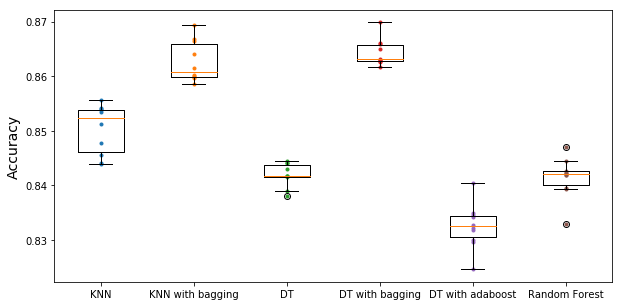

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

# Modified from Geron's coding example to include different classifiers
plt.figure(figsize=(10, 5))

plt.plot([1]*10, knn_scores, ".")
plt.plot([2]*10, bag_knn_scores, ".")
plt.plot([3]*10, dt_scores, ".")
plt.plot([4]*10, bag_dt_scores, ".")
plt.plot([5]*10, ada_dt_scores, ".")
plt.plot([6]*10, rf_scores, ".")
plt.boxplot([knn_scores, bag_knn_scores, dt_scores, bag_dt_scores, ada_dt_scores, rf_scores], labels=("KNN", "KNN with bagging", "DT", "DT with bagging", "DT with adaboost", "Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()